In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import json
import numpy as np

In [2]:
with open("../moneypuck_datadict.json", "r") as fp:
    datadict = json.load(fp)

## Data Loading

SO below, what we would want to do for the future is to have these `read_csv` links be inputted links from the user. By inputting a set amount of credentials, we have the user specify the player name (mispellings and case is not sensitive) and then select the kind of data. We would return the names of different links/options. Better yet, we should ask the user what they would want to look more in depth at here, which would automatically let us select which link the user would need to use. We would then grab the links via selenium right click and opening the link maybe?     

In [3]:
career_game_by_game = pd.read_csv('http://moneypuck.com/moneypuck/playerData/careers/gameByGame/regular/skaters/8476459.csv')
career_summarized_by_season = pd.read_csv('http://moneypuck.com/moneypuck/playerData/careers/perSeason/regular/skaters/8476459.csv')

In [4]:
career_summarized_by_season.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8476459,2011,Mika Zibanejad,OTT,C,other,9,296.0,5.0,0.80,...,6.25,0.75,14.0,14.0,0.00,0.0,0.0,0.0,0.0,0.0
1,8476459,2011,Mika Zibanejad,OTT,C,all,9,6966.0,157.0,0.49,...,28.61,25.51,428.0,400.0,0.00,0.0,0.0,0.0,0.0,0.0
2,8476459,2011,Mika Zibanejad,OTT,C,5on5,9,6223.0,141.0,0.49,...,14.38,13.17,314.0,269.0,0.32,0.1,6.0,2.0,3.0,2.0
3,8476459,2011,Mika Zibanejad,OTT,C,4on5,9,4.0,1.0,-0.39,...,0.00,2.58,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0
4,8476459,2011,Mika Zibanejad,OTT,C,5on4,9,443.0,10.0,0.29,...,4.43,0.56,63.0,6.0,0.00,0.0,0.0,0.0,0.0,0.0


## Career (Game by Game) Inspection and Cleaning

In [7]:
career_game_by_game.head()

,playerId,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,20111007,C,other,22.0,1.0,-0.12,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.

In [8]:
pd.set_option("display.max_columns", 200)
print(career_game_by_game.columns.to_list())

['playerId', 'season', 'name', 'gameId', 'playerTeam', 'opposingTeam', 'home_or_away', 'gameDate', 'position', 'situation', 'icetime', 'shifts', 'gameScore', 'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 'onIce_corsiPercentage', 'offIce_corsiPercentage', 'onIce_fenwickPercentage', 'offIce_fenwickPercentage', 'iceTimeRank', 'I_F_xOnGoal', 'I_F_xGoals', 'I_F_xRebounds', 'I_F_xFreeze', 'I_F_xPlayStopped', 'I_F_xPlayContinuedInZone', 'I_F_xPlayContinuedOutsideZone', 'I_F_flurryAdjustedxGoals', 'I_F_scoreVenueAdjustedxGoals', 'I_F_flurryScoreVenueAdjustedxGoals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_shotsOnGoal', 'I_F_missedShots', 'I_F_blockedShotAttempts', 'I_F_shotAttempts', 'I_F_points', 'I_F_goals', 'I_F_rebounds', 'I_F_reboundGoals', 'I_F_freeze', 'I_F_playStopped', 'I_F_playContinuedInZone', 'I_F_playContinuedOutsideZone', 'I_F_savedShotsOnGoal', 'I_F_savedUnblockedShotAttempts', 'penalties', 'I_F_penalityMinutes', 'I_F_faceOffsWon', 'I_F_hits', 'I_F_takeaways', 

In [9]:
career_game_by_game['gameDate'] = pd.to_datetime(career_game_by_game['gameDate'], format= '%Y%m%d') #formats to datetime

## Weighted Average script

In [10]:
def weighted_average(inputarray):
    length_of_input = len(inputarray)
    sum_of_input = sum(inputarray)
    average = sum_of_input/length_of_input 
    print(sum_of_input)
    print(length_of_input)
    print(average)

## Different Filters

In [11]:
mika2019 = career_game_by_game[career_game_by_game['season'] == 2019] #2019 filter
mika20195on5 = mika2019[mika2019['situation'] == '5on5'] #2019 5on5 filter
mika2019all = mika2019[mika2019['situation'] == 'all'] #2019 all situations filter
careerall = career_game_by_game[career_game_by_game['situation'] == 'all'] #all situations career

In [12]:
sorted(mika2019all['opposingTeam'].unique())

['ANA',
 'ARI',
 'BOS',
 'BUF',
 'CAR',
 'CBJ',
 'CGY',
 'CHI',
 'COL',
 'DAL',
 'DET',
 'EDM',
 'L.A',
 'MIN',
 'MTL',
 'N.J',
 'NSH',
 'NYI',
 'OTT',
 'PHI',
 'S.J',
 'STL',
 'TOR',
 'VAN',
 'VGK',
 'WPG',
 'WSH']

In [13]:
sorted(careerall['opposingTeam'].unique())

['ANA',
 'ARI',
 'BOS',
 'BUF',
 'CAR',
 'CBJ',
 'CGY',
 'CHI',
 'COL',
 'DAL',
 'DET',
 'EDM',
 'FLA',
 'L.A',
 'MIN',
 'MTL',
 'N.J',
 'NSH',
 'NYI',
 'NYR',
 'OTT',
 'PHI',
 'PIT',
 'S.J',
 'STL',
 'T.B',
 'TOR',
 'VAN',
 'VGK',
 'WPG',
 'WSH']

In [14]:
careerall.head(20)

,playerId,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
1,8476459,2011,Mika Zibanejad,2011020005,OTT,DET,AWAY,2011-10-07,C,all,780.0,19.0,-0.120,0.2659,0.5475,0.2609,0.5000,0.2632,0.4444,9.0,0.790,0.033,0.032,0.219,0.018,0.345,0.352,0.033,0.032,0.032,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.033,0.000,0.00,0.0,0.0,0.0,0.895,1.0,0.954,0.0,0.006,0.000,0.000,0.039,0.038,0.038,19.0,3.0,0.0,3.0,13.0,4.0,5.0,4.0,6.0,4.0,6.0,2820.0,0.0

In [15]:
careerall['I_F_mediumDangerxGoals'].sort_values(ascending = False)

2706    0.932
1416    0.579
1261    0.566
1391    0.559
2716    0.536
        ...  
1646    0.000
1651    0.000
1656    0.000
1661    0.000
1       0.000
Name: I_F_mediumDangerxGoals, Length: 603, dtype: float64

## Written Aim 

For the upcoming 2020 season (beginning January 13th in 2021 to compensate for Covid-19), the Rangers will face off only a certain number of relatively close teams. In the irregular 56 game season, the Rangers will play against 7 teams in their newly set Metropolitan division 8 different times. Of these 8 teams, we will analyze the best and worst teams Mika's performance is affected by. 

## Team Bar Plots

### Self-input Opposing Team Weighted Average Percentage Comparative Bar Plot

In [16]:
#eventually want function to have division splits
#eventually want function to have start date and end date

def opposing_team_two_average_percentage_comparisons_barplot(data,year,situation,percentages,percentage_colors,graph_title,percentage_legend):
    #sets the year for the user
    if year:
        year_data = data[data['season'] == year]
    else:
        year_data = data

    
    #filters the situation
    if situation:
        situation_data = year_data[year_data['situation'] == situation]
    else:
        situation_data = year_data

    #instantiates subplotting capabilities
    plt.subplots(figsize = (25,15))
    width = 0 #set the iterable widths outside of loop to be grown upon as more percentages are added
    
    
    #for a percentage in percentages
    for i, percentage in enumerate(percentages):
        spread = 0.25 #set the spread of bar graphs from one another

        #for the team in teams
        for j, team in enumerate(sorted(situation_data['opposingTeam'].unique())):
            team_matchup = situation_data[situation_data['opposingTeam'] == team]
            #get weighted average of the percentage for the team
            weighted_avg_percentage = np.average(team_matchup[percentage], weights = np.full(team_matchup.shape[0], team_matchup.shape[0]), axis = 0)

            #we need a condition to locate when to set the legend for what percentage
            if j == (len(situation_data['opposingTeam'].unique()) - 1):
                #plot across the barplot with all that weighted percentage with an "j + width" where width = 0 for first pass through
                plt.bar(j + width, weighted_avg_percentage, spread, alpha = 0.5, color = percentage_colors[i], label = percentage_legend[i])
            else: 
                plt.bar(j + width, weighted_avg_percentage, spread, alpha = 0.5, color = percentage_colors[i])
        
        #add 0.25 to width before iterating percentage for the next group of bars
        width = width + 0.25
    
    #establish grid
    plt.grid(which = 'major', axis = 'both')
    #plot xticks
    plt.xticks(list(range(len(situation_data['opposingTeam'].unique()))), sorted(situation_data['opposingTeam'].unique()), rotation = 60, fontsize = 16)
    #plot yticks
    plt.yticks(fontsize = 16)
    #set xlabel
    plt.xlabel('Opposing Teams', fontsize = 18)
    #set ylabel
    plt.ylabel('Weighted Average Percentages', fontsize = 18)
    #set title
    plt.title(graph_title, fontsize = 20)
    #set legend
    plt.legend(framealpha = 1, frameon = True, fontsize = 18)
    #change plot color
    #plt.rcParams('figure.facecolor') = 'gray';

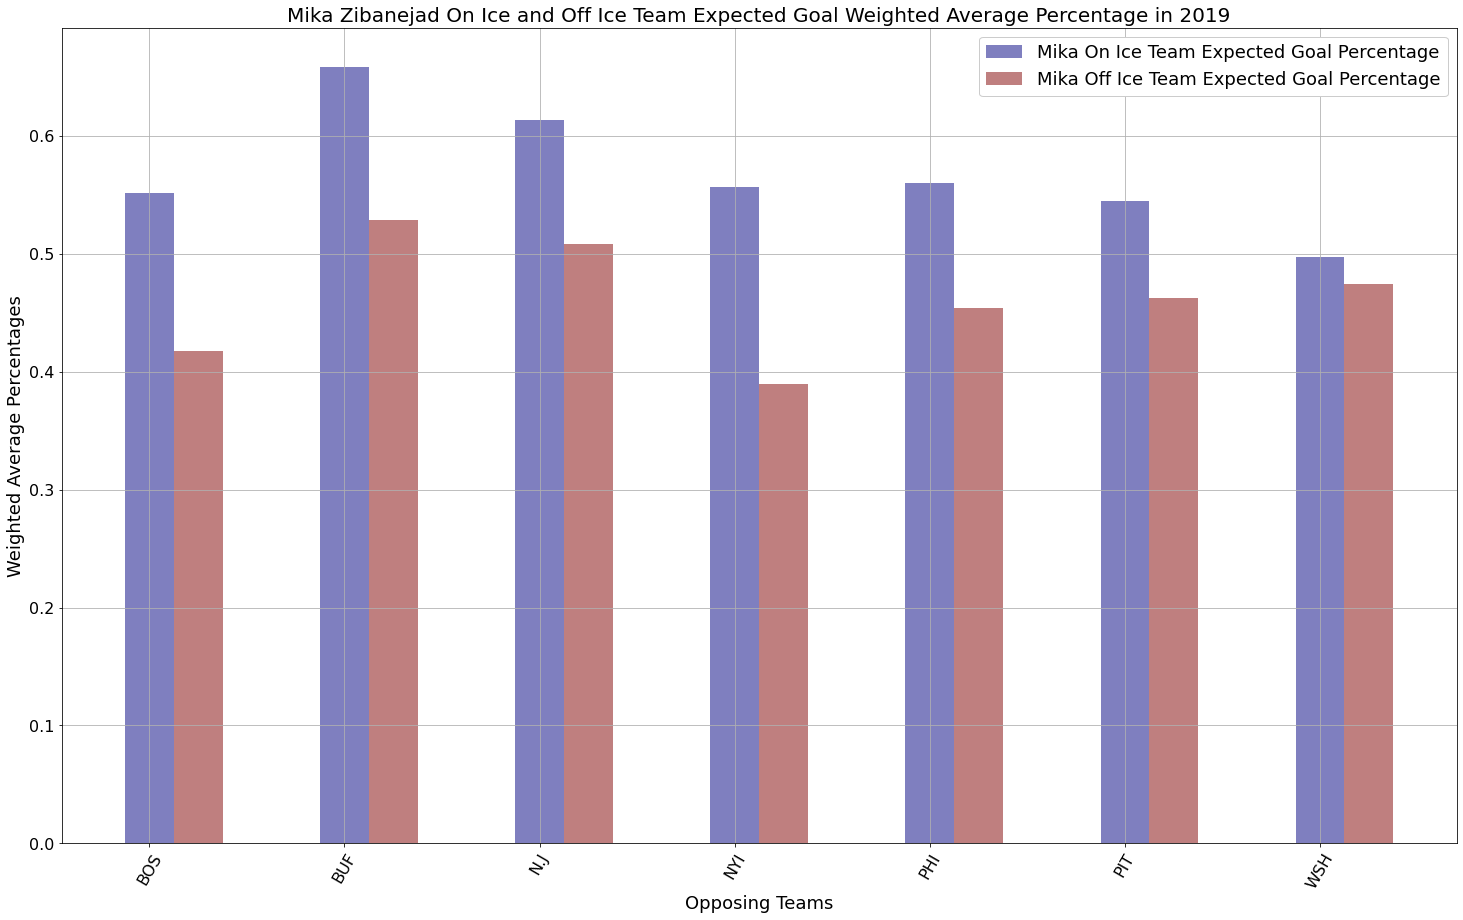

In [17]:
opposing_team_two_average_percentage_comparisons_barplot(career_game_by_game, 2020,  'all', ['onIce_xGoalsPercentage', 'offIce_xGoalsPercentage'],['navy', 'maroon'],'Mika Zibanejad On Ice and Off Ice Team Expected Goal Weighted Average Percentage in 2019', ['Mika On Ice Team Expected Goal Percentage', 'Mika Off Ice Team Expected Goal Percentage'])

A team's (unweighted measure) On Ice Expected Goals Percentage follows this formula:

$$ \frac{\text{On Ice Expected Goals For}}{(\text{On Ice Expected Goals For + On Ice Expected Goals Against})}$$

The Mika Zibanejad On Ice and Off Ice Team Exepected Goal Weighted Average Percentage in 2019 can be a useful indicator in assessing how impactful Mika's presence was on the ice against certain teams. A weighted average, instead of a normal average, was implemented to combat misleading values due to the different number of games a player plays against a team (due to season scheduling and due to player injury). The blue "On Ice" numerical weighted average percentage describes the measured team's weighted average expected goal percentage while Mika was on ice with them. This value includes contributions made by Mika as well as immediate linemates. From this graph alone, we can infer that Mika Zibanejad had a very offensive presence against Ottawa (OTT) in 2019 through analyzing the difference between on ice and off ice weighted percentages. When Mika stepped onto the ice, the Rangers showed a stronger offenssive presence with an amalgamated 80+ percent of team expected goal percentage to tower over their approximate 30 percent team expected goal percentage against Ottawa. This is also interesting to see as it might be an inference for how well a player performs against their former teams, as Mika spent some time playing for Ottawa before being acquired by the Rangers.

When observing other teams such as Buffalo (BUF), Calgary (CGY), Edmonton (EDM), and St. Louis (STL), we see that Mika Zibanejad's presence on ice does not show a more offensive outcome when compared to how well the team performs offenssively in expected goal percentage while Mika is off the ice. Superficially, this may indicate that Mika's performance with his team against these teams in 2019 is not exempletory. However, there is always more to the complete picture that what the graph shows.

Other notable mentions about how the graph falls short of the bigger picture about a single player's contributions. It must always be remembered that these weighted averages can be meaningful for how impactful a player's presence is with immediate linemates when performing on ice, but it does not give a full picture to the individual success of that player. When we observe outlying higher on ice weighted average percentages, we must also consider:

- the rest of the team may have generally performed poorly against teams where we see Mika's presence having a significant impact on the ice. His line may have been the best out of a whole poor team. 

- the Rangers may still have lost these games significantly even with a higher expected goal weighted average percentage. The presence of higher expected goals makes a player/line more interesting to watch, but may have not much tangible impact on a team. It should always be remembered that expected goals do not equate to tangible goals. 

- Mika could have been on the ice and not have much impact at all. He may have been lucky to be on the ice during the time a line is performing well. 

- the above plot also only showcases all situations (including Mika's contribution on power plays or disadvantages). For any player, this can have an impact on this statistic. 

- the opposing lines at the time may not have been statistically even in terms of strengths and weaknesses and allowed the Rangers' lines to succeed. 

When analyzing the negatives weighted averages (worse on ice performance over off ice):

- Mika have performed well individually, but the rest of his immediate line performed poorly. 

- the other lines of Rangers had better performances against certain lines on opposing teams which may have been poorly chosen. 

It is also noticed a few games are missing in Mika's 2019 performance. This is due to games missed from injury and games missed from a cut season. Such mentions are Pittsburgh (PIT), Tampa Bay (TB), are Florida Panthers (FLA).   

By the numbers of 2019 season for best chance against the new 2020 season of division spread, we hope to see these best performance trends to exist for these Metropolitan teams:

- Boston (BOS) positive On Ice at ~0.55

- New Jersey (NJ) positive On Ice at ~0.49

- Washington (WSH) positive On Ice at ~0.49

- New York Islanders (NYI) positive On Ice at ~0.42

- Buffalo (BUF) positive Off Ice at ~0.70

- Philidelphia (PHI) positive Off Ice at ~0.44

- Pittburgh (PIT) unaccountable as Mika did not play against Pittsburgh this season due to injury and due to shortened season.

In [18]:
import numpy as np

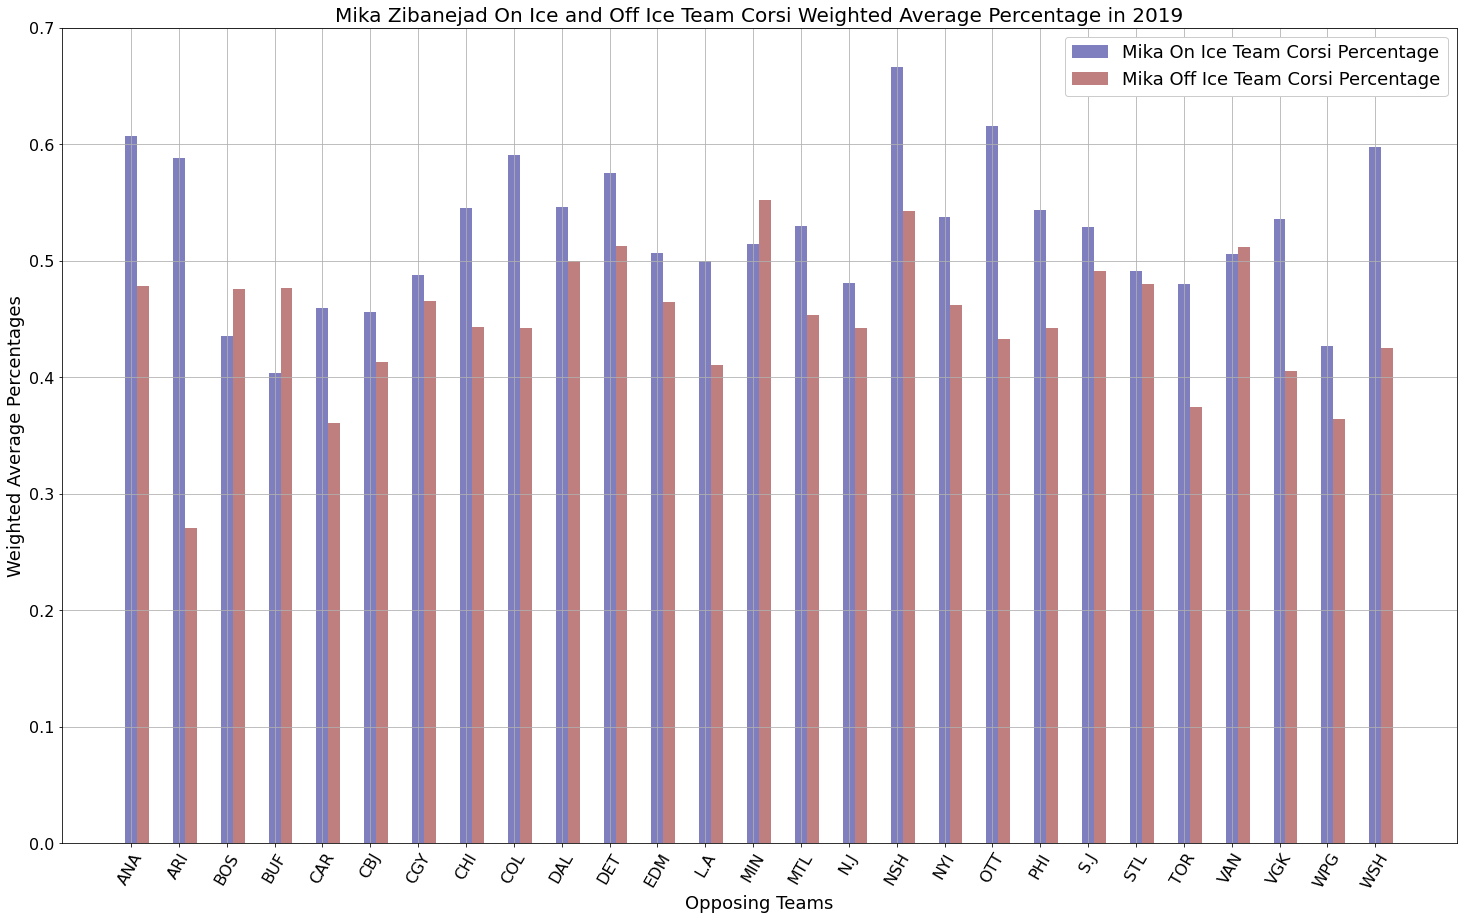

In [19]:
opposing_team_two_average_percentage_comparisons_barplot(career_game_by_game, 2019,  'all', ['onIce_corsiPercentage', 'offIce_corsiPercentage'],['navy', 'maroon'],'Mika Zibanejad On Ice and Off Ice Team Corsi Weighted Average Percentage in 2019', ['Mika On Ice Team Corsi Percentage', 'Mika Off Ice Team Corsi Percentage'])

A team's (unweighted measure) On Ice Corsi Percentage follows this formula:

$$ \frac{\text{On Ice Shot Attempts For}}{(\text{On Ice Shot Attempts For + On Ice Shot Attempts Against})}$$

By the team Corsi weighted average percentage stats with Mika Zibanejad present on ice and off ice, we can recognize how the many shots the team has made with these two conditions. This gives a good indication how offensive the immediate line with Mika Zibanejad has been. By the numbers, more shots were made when Mika was on ice than against, when playing against Nashville (NSH) as we analyze across the league. However, when analyzing the previous plot and look at the On Ice Team Expected Goals weighted average percentage opposing Nashville, we can see that Nashville had the second highest percentage. This makes a lot of these shot attempts higher quality when Mika was on ice. Another significant opposing team percentage to pay attention to when analyzing Mika's presence is against the Arizona Coyotes (ARI). Here we see the team, when Mika is present on ice, generating a significant amount of shot attempts by the the Corsi percentage and many of them being high quality shots by the expected goals percentage. When analyzing these numbers against Ottawa (OTT) from both plots, we see many of these shot attempts were very high quality as well, with Ottawa showcasing the second highest Corsi percentage and highest expected goal percentage. The shots for Ottawa in the Corsi percentage compare fairly to statistics seen across Washington's (WSH) Corsi percentage. However, by the expected goals percentage from the previous plot, we see that shots against Ottawa were much higher quality. These discrepensies are important to look out for many different 

It must be noted again that there are limitations to analyzing Corsi percentage in this way. Once again, the above stats only measure the team's  
By the numbers of 2019 season for best chance against the new 2020 season of division spread, we hope to see these best performance trends to exist for these Metropolitan teams:

- Washington (WSH) positive On Ice at ~0.60.

- Philadelphia (PHI) positive On Ice at ~0.55.

- New York Islanders (NYI) positive On Ice at ~0.53.

- New Jersey (N.J.) positive On Ice at ~0.48.

- Boston (BOS) positive Off Ice at ~0.48.

- Buffalo (BUF) positive Off Ice at ~0.48.

- Pittburgh (PIT) unaccountable as Mika did not play against Pittsburgh this season due to injury and due to shortened season.

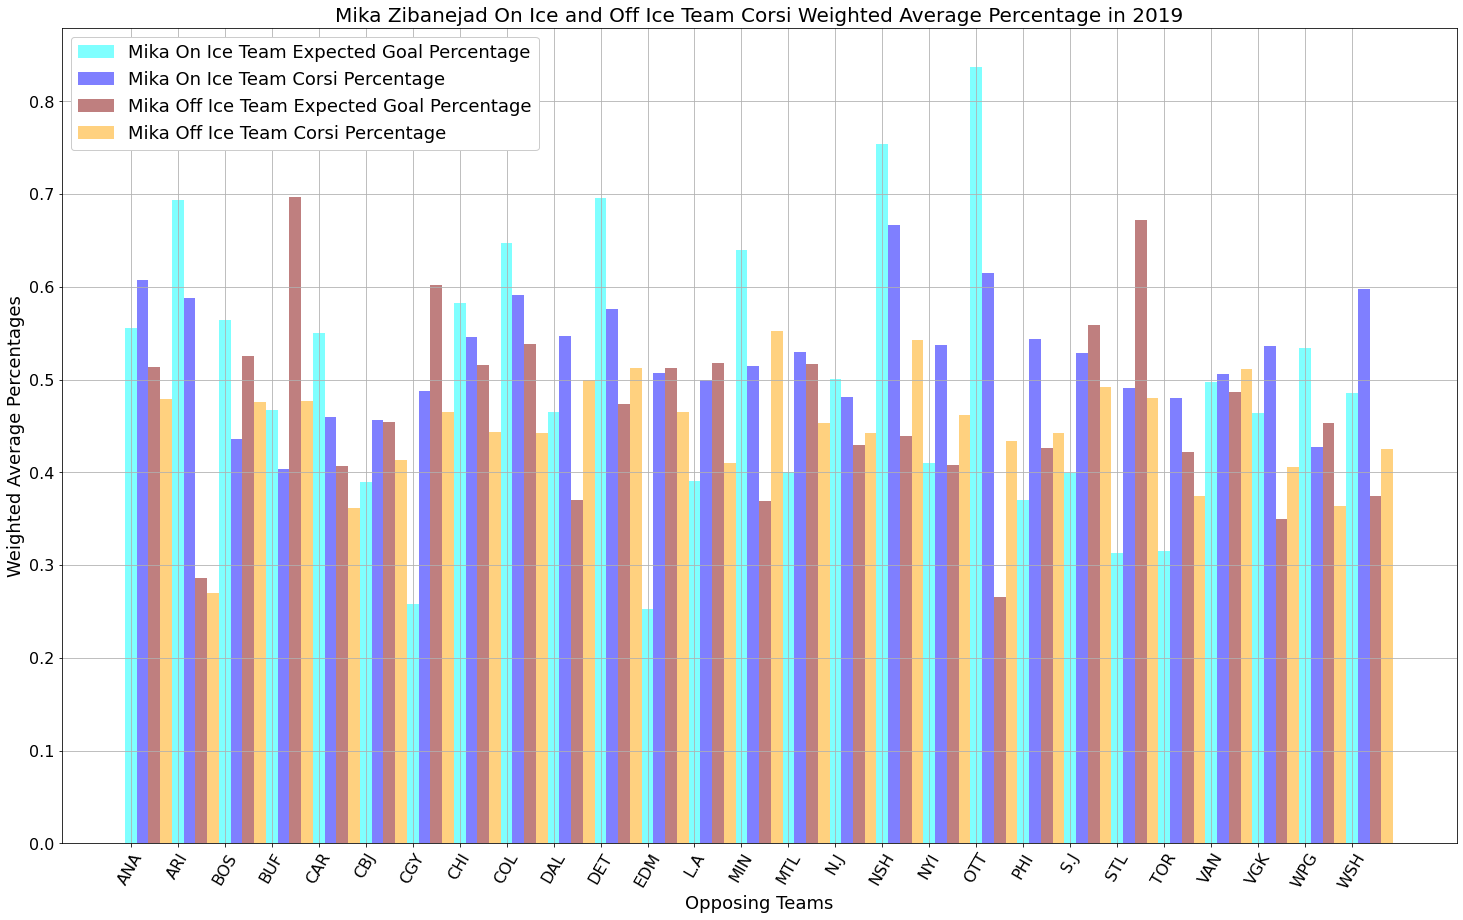

In [20]:
opposing_team_two_average_percentage_comparisons_barplot(career_game_by_game, 2019,  'all', ['onIce_xGoalsPercentage','onIce_corsiPercentage', 'offIce_xGoalsPercentage', 'offIce_corsiPercentage'],['cyan', 'blue', 'maroon', 'orange'],'Mika Zibanejad On Ice and Off Ice Team Corsi Weighted Average Percentage in 2019', ['Mika On Ice Team Expected Goal Percentage', 'Mika On Ice Team Corsi Percentage', 'Mika Off Ice Team Expected Goal Percentage', 'Mika Off Ice Team Corsi Percentage'])

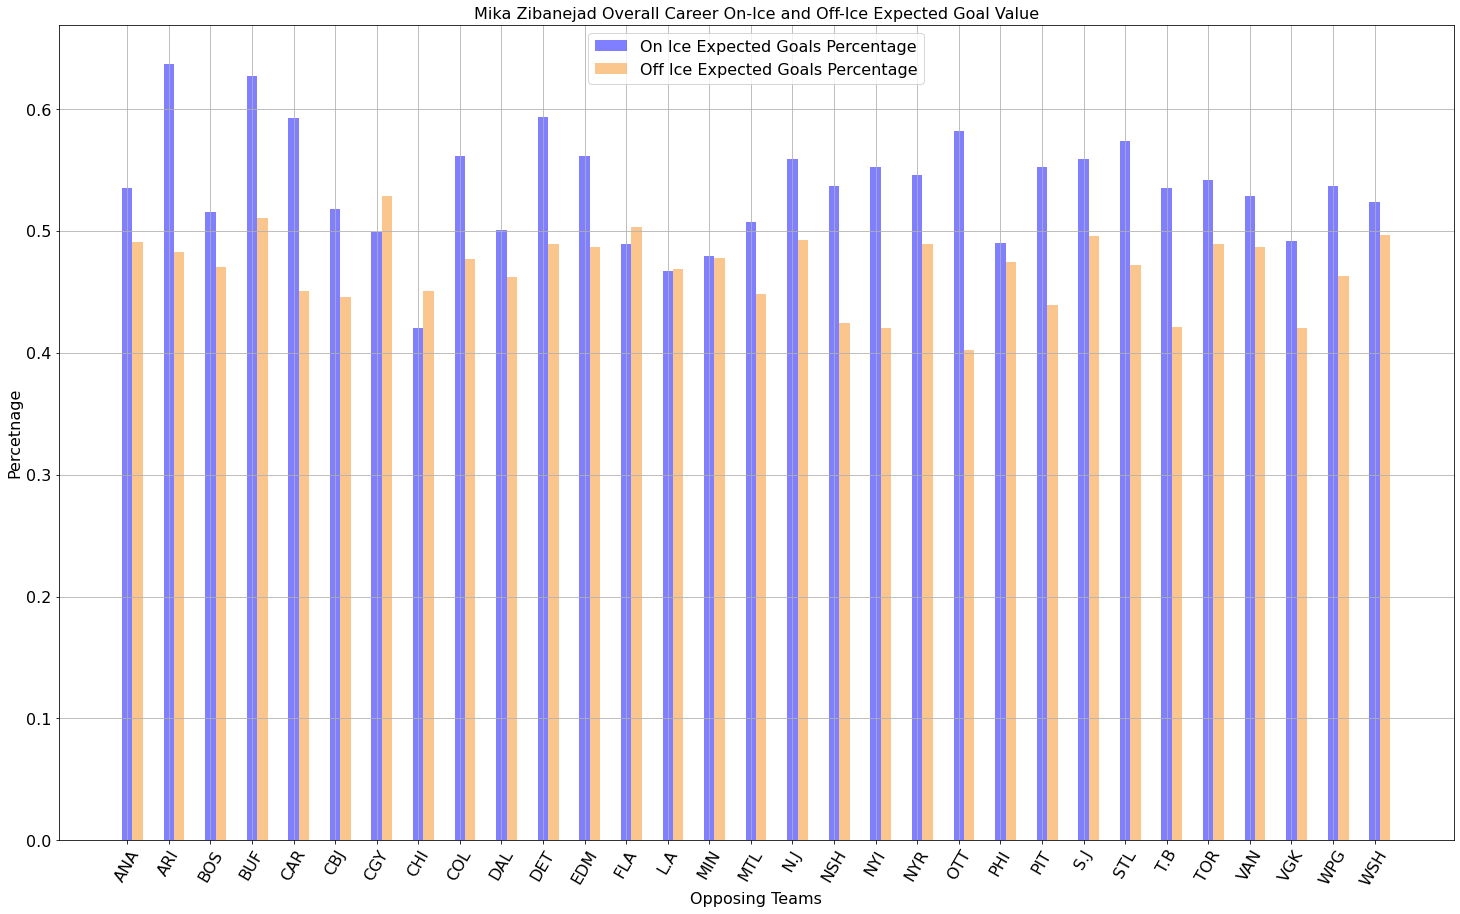

In [21]:
#Credit to code inspiration and model: https://www.dezyre.com/recipes/generate-grouped-bar-plot-in-python

pos = list(range(len(careerall['opposingTeam'].unique())))
width = 0.25

fig, ax = plt.subplots(figsize = (25,15))

rate_of_increase = 0
#for the team in all unique teams
for i, team in enumerate(sorted(careerall['opposingTeam'].unique())):
    #pick a team matchup
    teammatchup = careerall[careerall['opposingTeam'] == team]
    #get the weighted average of a percentage in that matchup
    #save that to a variable
    weightedavg_onicexgoalspercentage = np.average(teammatchup['onIce_xGoalsPercentage'], weights = np.full(teammatchup.shape[0], teammatchup.shape[0]), axis = 0)
    weightedavg_officexgoalspercentage = np.average(teammatchup['offIce_xGoalsPercentage'], weights = np.full(teammatchup.shape[0], teammatchup.shape[0]), axis = 0)
    
    
    #plot a barplot with the associated team and matching variable
    plt.bar(i, weightedavg_onicexgoalspercentage, width, alpha = 0.5, color = 'blue')#'#EE3224')
    plt.bar(i + width, weightedavg_officexgoalspercentage, width, alpha = 0.5, color = '#F78F1E')
    #do multiple percentages

plt.grid(which = 'major', axis = 'both')    
plt.xticks(pos, sorted(careerall['opposingTeam'].unique()), rotation = 60, fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Opposing Teams', fontsize = 16)
plt.ylabel('Percetnage', fontsize = 16)
plt.title('Mika Zibanejad Overall Career On-Ice and Off-Ice Expected Goal Value', fontsize = 16)
plt.legend(['On Ice Expected Goals Percentage', 'Off Ice Expected Goals Percentage'], loc = 'upper center', fontsize = 16);

In [22]:
len(careerall['opposingTeam'].unique())

31

## Plots

In [23]:
def opposing_team_two_average_percentage_comparisons_lineplot(data,year,situation,percentages,percentage_colors,graph_title,percentage_legend):
    #sets the year for the user
    if year:
        year_data = data[data['season'] == year]
    else:
        year_data = data

    
    #filters the situation
    if situation:
        situation_data = year_data[year_data['situation'] == situation]
    else:
        situation_data = year_data

    #instantiates subplotting capabilities
    plt.subplots(figsize = (25,15))
    width = 0 #set the iterable widths outside of loop to be grown upon as more percentages are added
    
    
    #for a percentage in percentages
    for i, percentage in enumerate(percentages):
        spread = 0.25 #set the spread of bar graphs from one another

        #for the team in teams
        for j, team in enumerate(sorted(situation_data['opposingTeam'].unique())):
            team_matchup = situation_data[situation_data['opposingTeam'] == team]
            #get weighted average of the percentage for the team
            weighted_avg_percentage = np.average(team_matchup[percentage], weights = np.full(team_matchup.shape[0], team_matchup.shape[0]), axis = 0)

            #we need a condition to locate when to set the legend for what percentage
            if j == (len(situation_data['opposingTeam'].unique()) - 1):
                #plot across the barplot with all that weighted percentage with an "j + width" where width = 0 for first pass through
                plt.bar(j + width, weighted_avg_percentage, spread, alpha = 0.5, color = percentage_colors[i], label = percentage_legend[i])
            else: 
                plt.bar(j + width, weighted_avg_percentage, spread, alpha = 0.5, color = percentage_colors[i])
        
        #add 0.25 to width before iterating percentage for the next group of bars
        width = width + 0.25
    
    #establish grid
    plt.grid(which = 'major', axis = 'both')
    #plot xticks
    plt.xticks(list(range(len(situation_data['opposingTeam'].unique()))), sorted(situation_data['opposingTeam'].unique()), rotation = 60, fontsize = 16)
    #plot yticks
    plt.yticks(fontsize = 16)
    #set xlabel
    plt.xlabel('Opposing Teams', fontsize = 18)
    #set ylabel
    plt.ylabel('Weighted Average Percentages', fontsize = 18)
    #set title
    plt.title(graph_title, fontsize = 20)
    #set legend
    plt.legend(framealpha = 1, frameon = True, fontsize = 18)
    #change plot color
    #plt.rcParams('figure.facecolor') = 'gray';

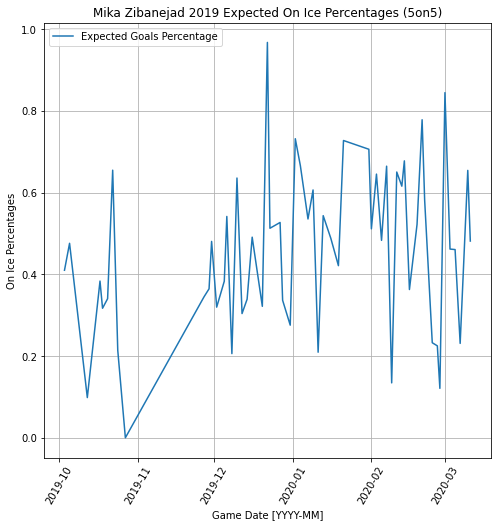

In [24]:
plt.figure(figsize = (8,8))

sns.lineplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_xGoalsPercentage'])
#sns.lmplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_xGoalsPercentage'])
#sns.catplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_xGoalsPercentage'])
#sns.lineplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_corsiPercentage'])
#sns.lineplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_fenwickPercentage'])


plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.legend(['Expected Goals Percentage', 'Corsi Percentage', 'Fenwick Percentage'], loc = 'upper left')
plt.title('Mika Zibanejad 2019 Expected On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

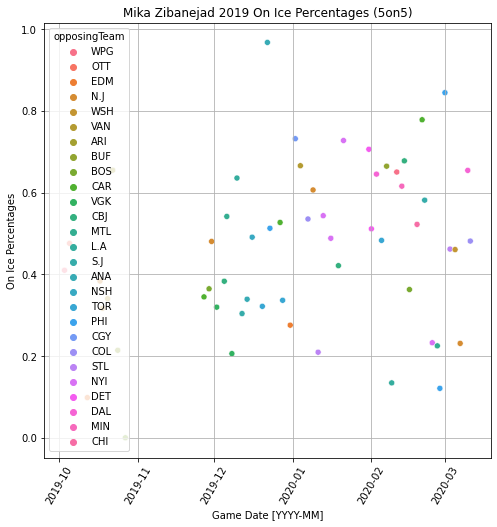

In [25]:
plt.figure(figsize = (8,8))

sns.scatterplot(x = mika20195on5['gameDate'], y = mika20195on5['onIce_xGoalsPercentage'], hue = mika20195on5['opposingTeam'])

plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.title('Mika Zibanejad 2019 On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

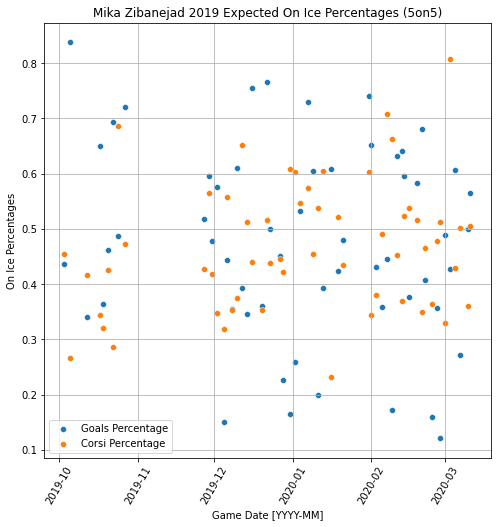

In [26]:
plt.figure(figsize = (8,8))

#sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['I_F_xGoals'])
sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['onIce_xGoalsPercentage'])
sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['offIce_xGoalsPercentage'])


plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.legend(['Goals Percentage', 'Corsi Percentage', 'Fenwick Percentage'], loc = 'lower left')
plt.title('Mika Zibanejad 2019 Expected On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

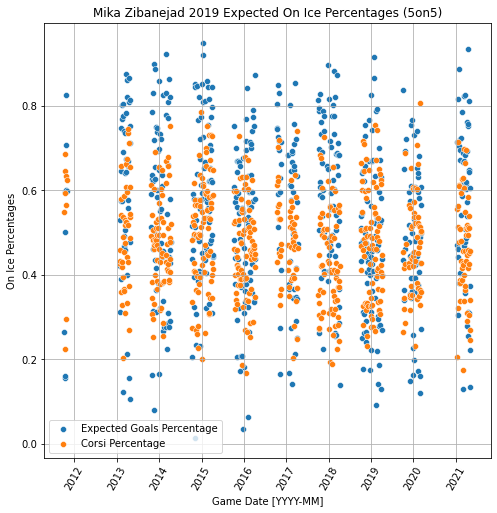

In [27]:
plt.figure(figsize = (8,8))

#sns.scatterplot(x = mika2019all['gameDate'], y = mika2019all['I_F_xGoals'])
sns.scatterplot(x = careerall['gameDate'], y = careerall['onIce_xGoalsPercentage'])
sns.scatterplot(x = careerall['gameDate'], y = careerall['offIce_xGoalsPercentage'])


plt.grid(which = 'major', axis = 'both')
plt.xlabel('Game Date [YYYY-MM]')
plt.ylabel('On Ice Percentages')
plt.legend(['Expected Goals Percentage', 'Corsi Percentage', 'Fenwick Percentage'], loc = 'lower left')
plt.title('Mika Zibanejad 2019 Expected On Ice Percentages (5on5)')
plt.xticks(rotation = 60);

### Ideas for Mika EDA:

- game by game timeseries line graph of "onIce_xGoalsPercentage". Can expand to year-by-year bar graphs. Can also expand by team. Should also cross-reference this for discovering which teams are teams Mika is best able to score on and which teams are harder for Mika to score on. 

- look into "offIce_xGoalsPercentage" with similar format above ^

- look into corsi percentage with similar format above^

- look into fenwick percentage with similar format above^

- all of such stuff should be looked at as a time series. 

- look into individual expected goals, on ice expected goals, and actual goals for Mika

- look into onIce expected goals and off ice extected goals

- look into i_f_xfreeze, and i_f_xrebounds, i_f_xplaycontinuedinzone, 